Dataset contains 28x28 grayscale image with value ranging from 0 - 255 

0 is represents black and 255 represent white

We have 70,000 images, devided into 60,000 training and 10,000 testing samples

## IMPORTING DATA

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
parent_path = '/content/drive/My Drive/LEARN/Fashion Classification/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
fashion_train_df = pd.read_csv(parent_path+'fashion-mnist_train.csv')
fashion_test_df = pd.read_csv(parent_path+'fashion-mnist_test.csv')

## VISUALIZATION OF THE DATASET

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [0]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

6.0

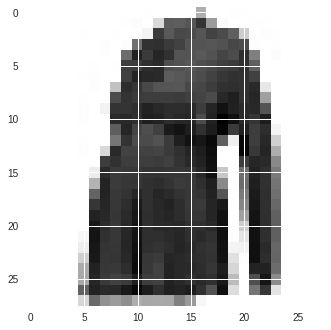

In [9]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28)) #taking all col start from 1
label = training[i,0]
label

In [0]:
#Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

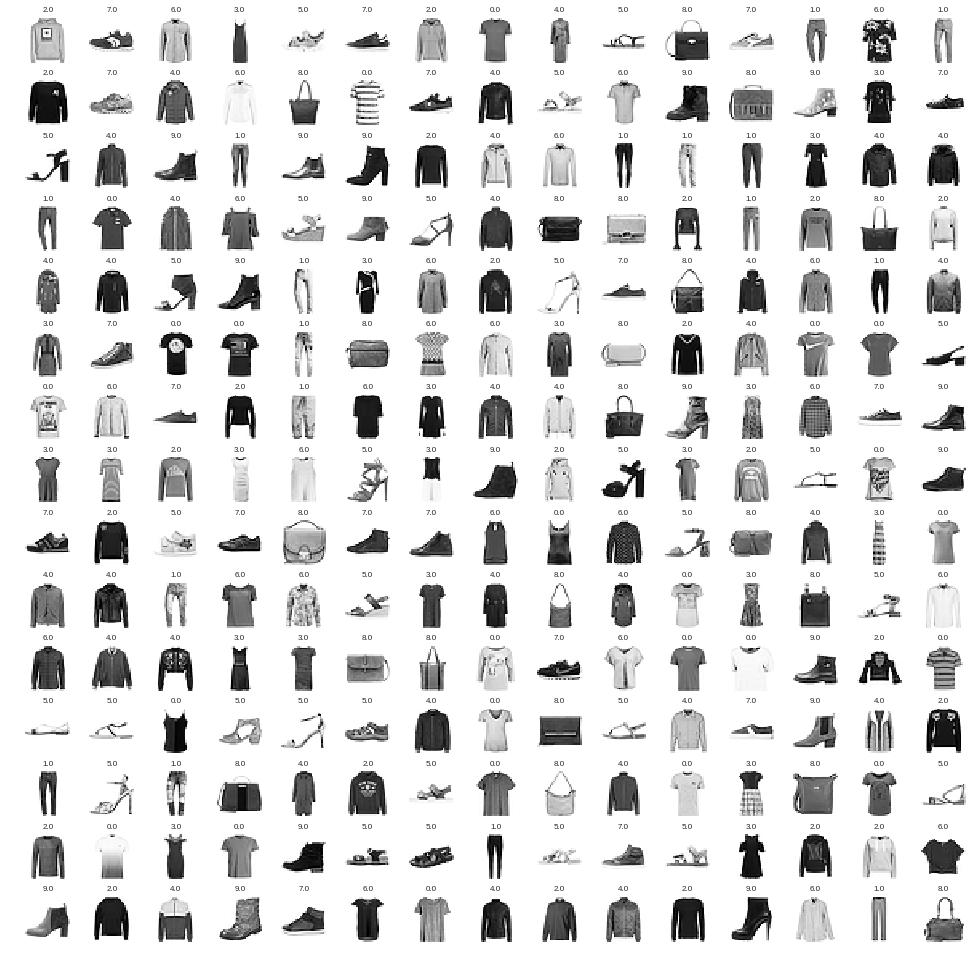

In [11]:
# Show image in a grid format
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() #flaten the 15 x 15 matrix into 255 array

n_training= len(training)

for i in np.arange(0, W_grid * L_grid) :
  #select random number
  index = np.random.randint(0, n_training)
  
  #read and display image
  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index, 0], fontsize=8)
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.4) 

## TRAINING MODEL

### Convolutional Neural Network 

**CNN Process**
![alt text](https://raw.githubusercontent.com/ANNASBlackHat/Fashion-Classification-Using-CNN/master/img/classify%20process.png)

**1. Feature Detector**

Detect image per pixel
![alt text](https://raw.githubusercontent.com/ANNASBlackHat/Fashion-Classification-Using-CNN/master/img/feature%20detector.png)

**2. RELU**

Eliminate negative number
![alt text](https://raw.githubusercontent.com/ANNASBlackHat/Fashion-Classification-Using-CNN/master/img/RELU.png)

**3. Max Pooling**

Take Maximum number

![alt text](https://raw.githubusercontent.com/ANNASBlackHat/Fashion-Classification-Using-CNN/master/img/MaxPooling.png)

**4. Flatten**
![alt text](https://raw.githubusercontent.com/ANNASBlackHat/Fashion-Classification-Using-CNN/master/img/Flatten.png)


In [0]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [0]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [49]:
X_train.shape

(48000, 28, 28, 1)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

In [53]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28,28,1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """


In [0]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', 
                 optimizer = Adam(lr=0.001),
                 metrics = ['accuracy'])

In [56]:
cnn_model.fit(X_train,
             y_train,
             batch_size = 512,
             epochs = 50,
             verbose = 1,
             validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 28s 590us/step - loss: 0.4516 - acc: 0.8424 - val_loss: 0.4381 - val_acc: 0.8428
Epoch 2/50
48000/48000 [==============================] - 29s 604us/step - loss: 0.4053 - acc: 0.8581 - val_loss: 0.4002 - val_acc: 0.8602
Epoch 3/50
48000/48000 [==============================] - 29s 610us/step - loss: 0.3744 - acc: 0.8699 - val_loss: 0.3648 - val_acc: 0.8757
Epoch 4/50
48000/48000 [==============================] - 29s 603us/step - loss: 0.3536 - acc: 0.8771 - val_loss: 0.3525 - val_acc: 0.8787
Epoch 5/50
48000/48000 [==============================] - 30s 617us/step - loss: 0.3423 - acc: 0.8803 - val_loss: 0.3464 - val_acc: 0.8796
Epoch 6/50
48000/48000 [==============================] - 30s 620us/step - loss: 0.3247 - acc: 0.8868 - val_loss: 0.3319 - val_acc: 0.8846
Epoch 7/50
48000/48000 [==============================] - 30s 623us/step - loss: 0.3088 - acc: 0.8931 - val_loss: 0.

## EVALUATING THE MODEL

In [58]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 200us/step
Test Accuracy : 0.913


In [59]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

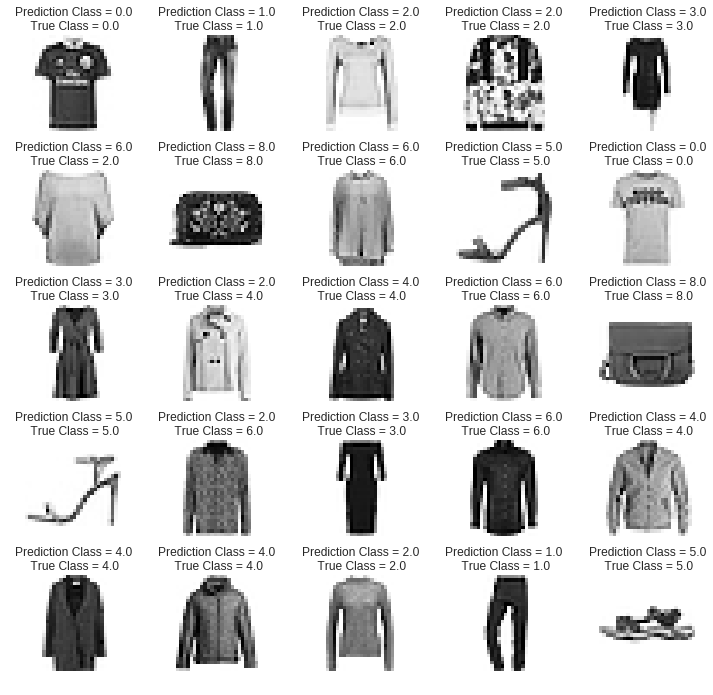

In [63]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')
  
plt.subplots_adjust(wspace=0.5)  

**Confusion matrix**

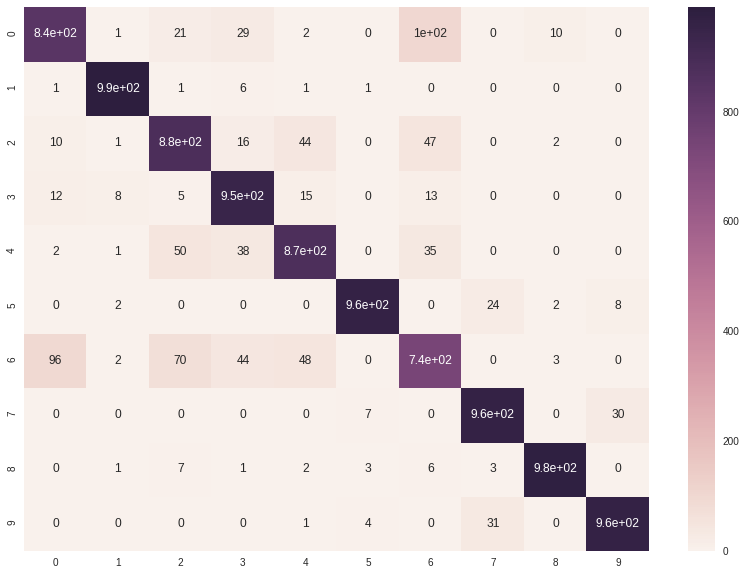

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [65]:
from sklearn.metrics import classification_report
num_classes = 10
target_name = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_name))

              precision    recall  f1-score   support

     Class 0       0.87      0.84      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.85      0.88      0.87      1000
     Class 3       0.88      0.95      0.91      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.78      0.74      0.76      1000
     Class 7       0.94      0.96      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### IMPROVING MODEL
- Increasing number of kernel/Feature detector to 64 instead of 32
- using dropout

**Dropout** is a regularizarion technique for reducing iverfitting in neural network